# Basic Model

## Prepare training data

In [1]:
import pandas as pd
import sys,os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

Using TensorFlow backend.


In [4]:
image_path = "D:/Projects/CK_plus/datasets/images"
label_path = "D:/Projects/CK_plus/datasets/Emotion"
image_target_path = "D:/Projects/CK_plus/datasets/target_images"

# image_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/cohn-kanade-images"
# label_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/Emotion"
# image_target_path = "/Users/lahaale/Downloads/Courses/AI/project/CK+/images"

In [5]:
img_data = pd.read_csv("CSV/img_data.csv")
img_data = img_data[['img_id','em_id','emotion','img_num']]
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,3,11
1,S005_001_00000008,S005_001_00000011,3,11
2,S005_001_00000009,S005_001_00000011,3,11
3,S005_001_00000010,S005_001_00000011,3,11
4,S005_001_00000011,S005_001_00000011,3,11


In [6]:
# Anger,Contempt, Disgust, Fear, Happy, Sadness and Surprise.
emotions_dict = {1:"An",2:"Con",3:"Di",4:"Fe",5:"Ha",6:"Sa",7:"Sur"}
emotions_dict

{1: 'An', 2: 'Con', 3: 'Di', 4: 'Fe', 5: 'Ha', 6: 'Sa', 7: 'Sur'}

In [7]:
img_data['emotion']=img_data.emotion.apply(lambda em:emotions_dict[em])
img_data.head()

,img_id,em_id,emotion,img_num
0,S005_001_00000007,S005_001_00000011,Di,11
1,S005_001_00000008,S005_001_00000011,Di,11
2,S005_001_00000009,S005_001_00000011,Di,11
3,S005_001_00000010,S005_001_00000011,Di,11
4,S005_001_00000011,S005_001_00000011,Di,11


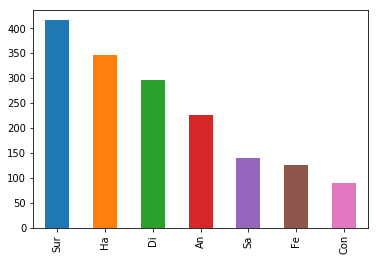

In [8]:
img_data.emotion.value_counts().plot(kind="bar")

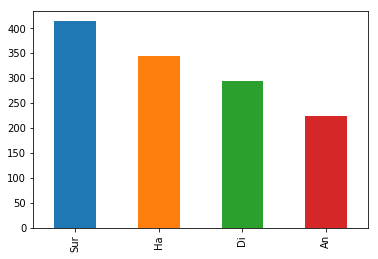

In [9]:
img_data = img_data[~img_data.emotion.isin(['Sa','Fe','Con'])]
img_data.emotion.value_counts().plot(kind="bar")

In [10]:

img_data['name']=img_data.img_id.apply(lambda id: id+".png")
img_data.head()

,img_id,em_id,emotion,img_num,name
0,S005_001_00000007,S005_001_00000011,Di,11,S005_001_00000007.png
1,S005_001_00000008,S005_001_00000011,Di,11,S005_001_00000008.png
2,S005_001_00000009,S005_001_00000011,Di,11,S005_001_00000009.png
3,S005_001_00000010,S005_001_00000011,Di,11,S005_001_00000010.png
4,S005_001_00000011,S005_001_00000011,Di,11,S005_001_00000011.png


In [11]:
train_index = np.random.rand(len(img_data)) < 0.8
train_set = img_data[train_index].copy()
val_set = img_data[~train_index].copy()

In [12]:
print("train_set_num=",len(train_set))
print("test_set_num=",len(val_set))
print("total_set_num=",len(img_data))

train_set_num= 1031
test_set_num= 249
total_set_num= 1280


In [13]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()

In [14]:
val_set.head()

,img_id,em_id,emotion,img_num,name
5,S010_002_00000010,S010_002_00000014,Sur,14,S010_002_00000010.png
7,S010_002_00000012,S010_002_00000014,Sur,14,S010_002_00000012.png
11,S010_004_00000016,S010_004_00000019,An,19,S010_004_00000016.png
12,S010_004_00000017,S010_004_00000019,An,19,S010_004_00000017.png
14,S010_004_00000019,S010_004_00000019,An,19,S010_004_00000019.png


In [15]:
batch_size=16
width = 480
hight = 480
train_generator =  train_gen.flow_from_dataframe(train_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True,
                                                 # data augmentation
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest'
                                                )


Found 1009 images belonging to 4 classes.


In [16]:
imge, label = train_generator.next()
print(label)

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [16]:
validation_generator = val_gen.flow_from_dataframe(val_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              batch_size=batch_size, shuffle=True,
                              class_mode="categorical",
                              save_format='png')

Found 245 images belonging to 4 classes.


In [23]:
import keras
from keras import applications

vgg16 = applications.vgg16.VGG16(include_top=False,input_shape=(width,hight,3))


In [18]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 480, 480, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 480, 480, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 480, 480, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 240, 240, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 240, 240, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 240, 240, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 120, 120, 128)     0         
__________

In [25]:
layer_num = len(vgg16.layers)
for i in range(layer_num):
    if i < layer_num-7:
        vgg16.layers[i].trainable = False

for layer in vgg16.layers:
    print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
True
True
True
True
True
True
True


In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(vgg16)
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(4, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['categorical_accuracy'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 15, 15, 512)       14714688  
_________________________________________________________________
dense_3 (Dense)              (None, 15, 15, 32)        16416     
_________________________________________________________________
flatten_2 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 28804     
Total params: 14,759,908
Trainable params: 11,844,260
Non-trainable params: 2,915,648
_________________________________________________________________


In [28]:
model.fit_generator(
        generator=train_generator,
        steps_per_epoch=128//batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=64//batch_size
)


Epoch 1/20
8/8 [==============================] - 159s 20s/step - loss: 12.2749 - categorical_accuracy: 0.1875 - val_loss: 13.0960 - val_categorical_accuracy: 0.1875
Epoch 2/20
8/8 [==============================] - 153s 19s/step - loss: 13.9774 - categorical_accuracy: 0.1328 - val_loss: 11.5564 - val_categorical_accuracy: 0.2830
Epoch 3/20
8/8 [==============================] - 160s 20s/step - loss: 13.0960 - categorical_accuracy: 0.1875 - val_loss: 14.3552 - val_categorical_accuracy: 0.1094
Epoch 4/20
8/8 [==============================] - 160s 20s/step - loss: 12.4663 - categorical_accuracy: 0.2266 - val_loss: 13.8515 - val_categorical_accuracy: 0.1406
Epoch 5/20
8/8 [==============================] - 160s 20s/step - loss: 13.5996 - categorical_accuracy: 0.1562 - val_loss: 12.8441 - val_categorical_accuracy: 0.2031
Epoch 6/20
8/8 [==============================] - 139s 17s/step - loss: 14.0736 - categorical_accuracy: 0.1268 - val_loss: 13.6852 - val_categorical_accuracy: 0.1509
Epoc

In [29]:
history = model.history

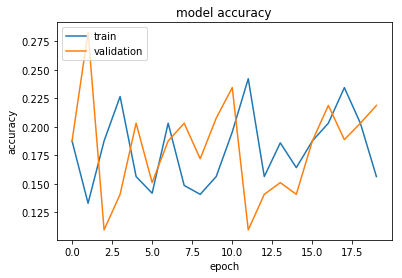

In [30]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

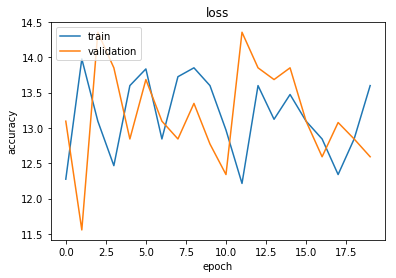

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
print(model.predict_classes)

<bound method Sequential.predict_classes of <keras.engine.sequential.Sequential object at 0x000001C382D83080>>


In [50]:
test_index = np.random.rand(len(val_set)) < 0.5
test_set = val_set[test_index].copy()
test_generator =  train_gen.flow_from_dataframe(test_set,directory=image_target_path,x_col="name",
                              y_col="emotion",target_size=(width,hight),
                              class_mode="categorical",  
                              batch_size=batch_size, shuffle=True)

Found 118 images belonging to 4 classes.


In [51]:
prediction = model.predict_generator(test_generator,steps=len(test_set)/batch_size,verbose=0)

In [52]:
test_generator.class_indices

{'An': 0, 'Di': 1, 'Ha': 2, 'Sur': 3}

In [53]:
y_true = np.array(test_generator.classes) + 1
y_true_label = []
for i in y_true:
    y_true_label.append(emotions_dict[i])
y_pred = np.argmax(prediction,axis=1)
y_pred = y_pred+1
y_pred_label = []
for i in y_pred:
    y_pred_label.append(emotions_dict[i])


In [54]:
len(test_generator.classes)

118

In [55]:
len(y_pred)

118

In [56]:
y_pred = np.argmax(prediction,axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_generator.classes, y_pred))

Confusion Matrix
[[21  0  0  0]
 [32  0  0  0]
 [26  0  0  0]
 [39  0  0  0]]
